In [13]:
import numpy as np
import pandas as pd


%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns


C:\Users\alekhya.mateti\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
dataset=pd.read_csv("Airplane_Crashes_and_Fatalities_Since_1908.csv")

In [4]:
dataset.head()

,Date,Time,Location,Operator,Flight #,Route,Type,Registration,cn/In,Aboard,Fatalities,Ground,Summary
0,09/17/1908,17:18,"Fort Myer, Virginia",Military - U.S. Army,NaN,Demonstration,Wright Flyer III,NaN,1,2.0,1.0,0.0,"During a demonstration flight, a U.S. Army fly..."
1,07/12/1912,06:30,"AtlantiCity, New Jersey",Military - U.S. Navy,NaN,Test flight,Dirigible,NaN,NaN,5.0,5.0,0.0,First U.S. dirigible Akron exploded just offsh...
2,08/06/1913,NaN,"Victoria, British Columbia, Canada",Private,-,NaN,Curtiss seaplane,NaN,NaN,1.0,1.0,0.0,The first fatal airplane accident in Canada oc...
3,09/09/1913,18:30,Over the North Sea,Military - German Navy,NaN,NaN,Zeppelin L-1 (airship),NaN,NaN,20.0,14.0,0.0,The airship flew into a thunderstorm and encou...
4,10/17/1913,10:30,"Near Johannisthal, Germany",Military - German Navy,NaN,NaN,Zeppelin L-2 (airship),NaN,NaN,30.0,30.0,0.0,Hydrogen gas which was being vented was sucked...


In [5]:
dataset['Date']=pd.to_datetime(dataset['Date'])
dataset['Year']=pd.DatetimeIndex(dataset['Date']).year

In [51]:
dataset['Decade']=round(dataset['Year']/10)*10
dataset.Decade=dataset.Decade.astype(int)


In [52]:
dataset['Fatalities'].isnull().values.sum()
dataset['Fatalities']=dataset['Fatalities'].fillna(0)

In [11]:
print(dataset.dtypes)

Date            datetime64[ns]
Time                    object
Location                object
Operator                object
Flight #                object
Route                   object
Type                    object
Registration            object
cn/In                   object
Aboard                 float64
Fatalities             float64
Ground                 float64
Summary                 object
Year                     int64
Decade                   int32
dtype: object


In [35]:
dataset.corr()

,Aboard,Fatalities,Ground,Year,Decade
Aboard,1.000000,0.757172,0.023241,0.156472,0.152772
Fatalities,0.757172,1.000000,0.035170,0.109586,0.105478
Ground,0.023241,0.035170,1.000000,0.029193,0.028242
Year,0.156472,0.109586,0.029193,1.000000,0.991626
Decade,0.152772,0.105478,0.028242,0.991626,1.000000


In [41]:
Decade_dataset=dataset[['Date','Decade']].groupby('Decade').count()
Decade_dataset["Decade"]=Decade_dataset.index
Decade_dataset=Decade_dataset.rename(columns={'Date':'Count'})

In [42]:
Decade_dataset.head()

,Count,Decade
Decade,,
1910,5,1910
1920,94,1920
1930,247,1930
1940,409,1940
1950,598,1950


(0, 1349.985649110049)

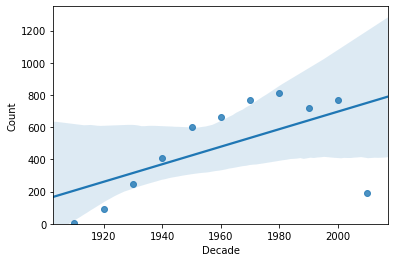

In [43]:

sns.regplot(x="Decade", y="Count", data=Decade_dataset)
plt.ylim(0,)

In [44]:
Year_dataset=dataset[['Date','Year']].groupby('Year').count()
Year_dataset["Year"]=Year_dataset.index
Year_dataset=Year_dataset.rename(columns={'Date':'Count'})

In [45]:
Year_dataset

,Count,Year
Year,,
1908,1,1908
1912,1,1912
1913,3,1913
1915,2,1915
1916,5,1916
...,...,...
2005,51,2005
2006,49,2006
2007,54,2007


(0, 109.23974016759023)

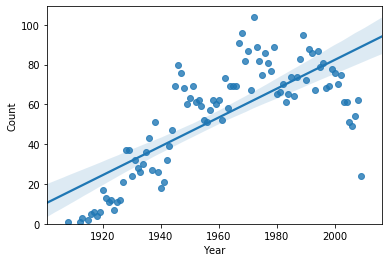

In [50]:

sns.regplot(x="Year", y="Count", data=Year_dataset)
plt.ylim(0,)

In [58]:
Year_Fatalities_dataset=dataset[['Fatalities','Year']].groupby('Year').sum()
Year_Fatalities_dataset["Year"]=Year_Fatalities_dataset.index

(0, 3100.9399477705488)

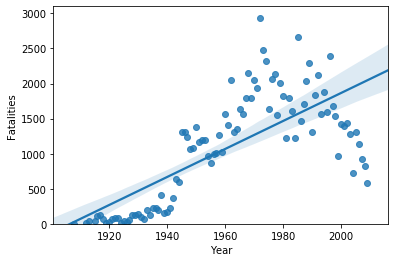

In [59]:

sns.regplot(x="Year", y="Fatalities", data=Year_Fatalities_dataset)
plt.ylim(0,)

In [60]:
Year_Fatalities_dataset.corr()

,Fatalities,Year
Fatalities,1.000000,0.732105
Year,0.732105,1.000000


In [68]:
dataset.Route=dataset.Route.astype(str)
dataset['Route']=dataset['Route'].replace('nan','Un Identified')
Route_Dataset=dataset[['Date','Route']].groupby('Route').count()
Route_Dataset.rename(columns={"Date":"Count"},inplace=True)
Route_Dataset.head()
Route_Dataset.sort_values(by = ['Count'],ascending=False,inplace=True)
Route_Dataset=Route_Dataset[0:5]
Route_Dataset.sort_values(by=['Count'],ascending=True,inplace=True)
Route_Dataset['Route']=Route_Dataset.index
Route_Dataset


,Count,Route
Route,,
Test,6,Test
Test flight,17,Test flight
Sightseeing,29,Sightseeing
Training,81,Training
Un Identified,1706,Un Identified


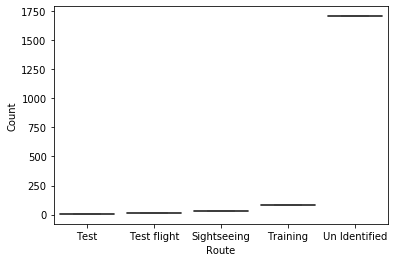

In [70]:
sns.boxplot(x="Route", y="Count", data=Route_Dataset)

In [71]:
from scipy import stats

In [72]:
pearson_coef, p_value = stats.pearsonr(Year_Fatalities_dataset['Year'], Year_Fatalities_dataset['Fatalities'])
print("The Pearson Correlation Coefficient is", pearson_coef, " with a P-value of P =", p_value)  

The Pearson Correlation Coefficient is 0.7321053374292882  with a P-value of P = 1.0843863908885843e-17


In [74]:
from sklearn.linear_model import LinearRegression

In [90]:
lm=LinearRegression()
x=Year_Fatalities_dataset[['Year']]
y=Year_Fatalities_dataset['Fatalities']
lm.fit(x,y)
print(lm)
Yhat=lm.predict(x)
print(Yhat)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
[  27.92124541  107.89222649  127.88497177  167.87046231  187.86320758
  207.85595285  227.84869812  247.84144339  267.83418867  287.82693394
  307.81967921  327.81242448  347.80516975  367.79791502  387.79066029
  407.78340557  427.77615084  447.76889611  467.76164138  487.75438665
  507.74713192  527.73987719  547.73262247  567.72536774  587.71811301
  607.71085828  627.70360355  647.69634882  667.68909409  687.68183937
  707.67458464  727.66732991  747.66007518  767.65282045  787.64556572
  807.63831099  827.63105627  847.62380154  867.61654681  887.60929208
  907.60203735  927.59478262  947.58752789  967.58027317  987.57301844
 1007.56576371 1027.55850898 1047.55125425 1067.54399952 1087.5367448
 1107.52949007 1127.52223534 1147.51498061 1167.50772588 1187.50047115
 1207.49321642 1227.4859617  1247.47870697 1267.47145224 1287.46419751
 1307.45694278 1327.44968805 1347.44243332 1367.4351786  1387.4279238

In [91]:
lm.intercept_ #Intercept (a)

-38118.236732540216

In [92]:
lm.coef_ #Slope (b)

array([19.99274527])

In [110]:
Year_Fatalities_dataset["Predicted Fatalities"]=lm.intercept_+lm.coef_*Year_Fatalities_dataset['Year']
Year_Fatalities_dataset

,Fatalities,Year,Predicted Fatalities
Year,,,
1908,1.0,1908,27.921245
1912,5.0,1912,107.892226
1913,45.0,1913,127.884972
1915,40.0,1915,167.870462
1916,108.0,1916,187.863208
...,...,...,...
2005,1306.0,2005,1967.217537
2006,1136.0,2006,1987.210282
2007,931.0,2007,2007.203027


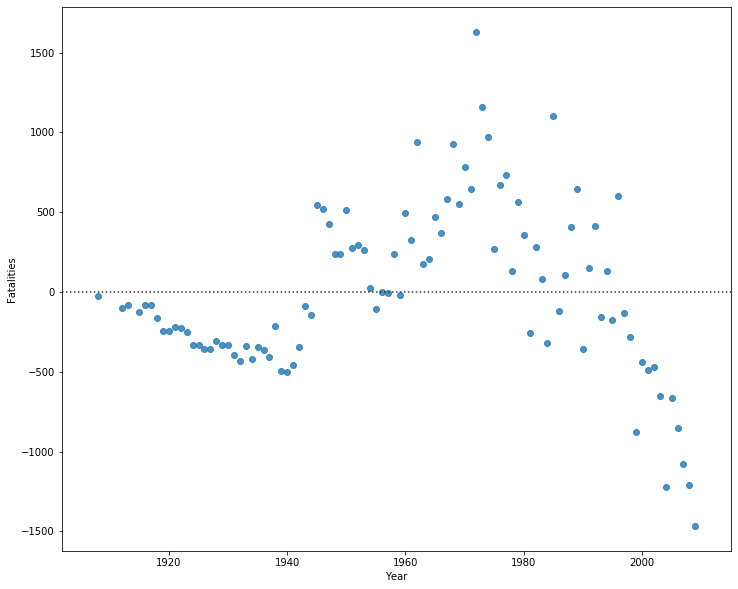

In [112]:
width = 12
height = 10
plt.figure(figsize=(width, height))
sns.residplot(Year_Fatalities_dataset['Year'], Year_Fatalities_dataset['Fatalities'])
plt.show()

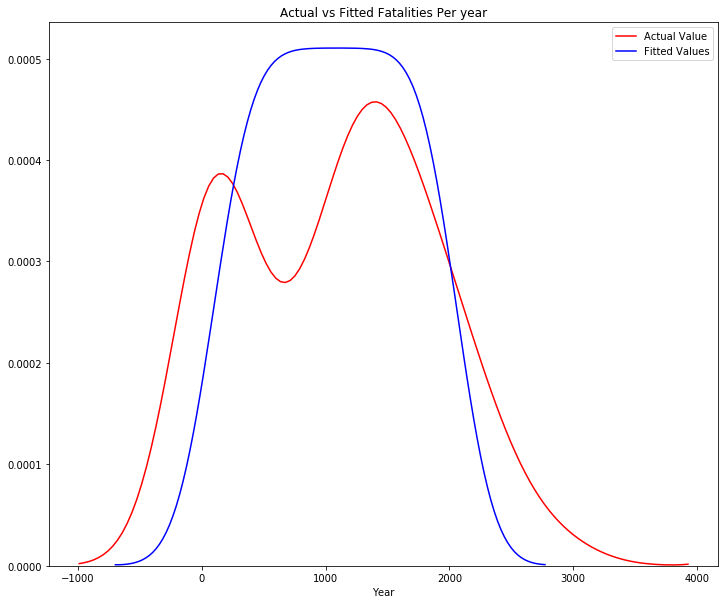

In [109]:
width = 12
height = 10
plt.figure(figsize=(width, height))


ax1 = sns.distplot(Year_Fatalities_dataset['Fatalities'], hist=False, color="r", label="Actual Value")
sns.distplot(Yhat, hist=False, color="b", label="Fitted Values" , ax=ax1)


plt.title('Actual vs Fitted Fatalities Per year')
plt.xlabel('Year')
plt.ylabel('')
# plt.xlim(1850,2050)
plt.show()
plt.close()

In [176]:
def PlotPolly(model, independent_variable, dependent_variabble, Name):
    x_new = np.linspace(15, 55, 100)
    y_new = model(x_new)

    plt.plot(independent_variable, dependent_variabble, '.', x_new, y_new, '-')
    plt.title('Polynomial Fit with Matplotlib for Fatalities ~ Year')
    ax = plt.gca()
    ax.set_facecolor((0.898, 0.898, 0.898))
    fig = plt.gcf()
    plt.xlabel(Name)
    plt.ylabel('Price of Cars')

    plt.show()
    plt.close()

          3         2
-0.01521 x + 88.95 x - 1.734e+05 x + 1.127e+08


C:\Users\alekhya.mateti\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\alekhya.mateti\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\Users\alekhya.mateti\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


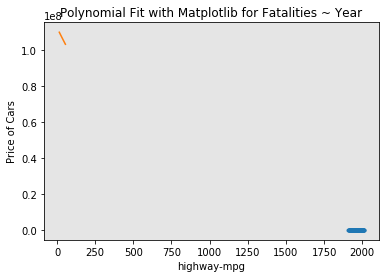

In [177]:
x = Year_Fatalities_dataset['Year']
y = Year_Fatalities_dataset['Fatalities']
# Here we use a polynomial of the 3rd order (cubic) 
f = np.polyfit(x, y, 3)
p = np.poly1d(f)
print(p)
PlotPolly(p, x, y, 'highway-mpg')

In [178]:
%%capture
! pip install ipywidgets

In [179]:
from IPython.display import display
from ipywidgets import widgets 
from IPython.display import display
from ipywidgets import interact, interactive, fixed, interact_manual

In [180]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    plt.xlabel('Year')
    plt.ylabel('Fatalities')

    plt.show()
    plt.close()

In [181]:
def PollyPlot(xtrain, xtest, y_train, y_test, lr,poly_transform):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))
    
    
    #training data 
    #testing data 
    # lr:  linear regression object 
    #poly_transform:  polynomial transformation object 
 
    xmax=max([xtrain.values.max(), xtest.values.max()])

    xmin=min([xtrain.values.min(), xtest.values.min()])

    x=np.arange(xmin, xmax, 0.1)


    plt.plot(xtrain, y_train, 'ro', label='Training Data')
    plt.plot(xtest, y_test, 'go', label='Test Data')
    plt.plot(x, lr.predict(poly_transform.fit_transform(x.reshape(-1, 1))), label='Predicted Function')
    plt.ylim(0,)
    plt.ylabel('Fatalities')
    plt.legend()

In [182]:
y_data = dataset['Fatalities']

In [183]:
x_data=dataset.drop('Fatalities',axis=1)

In [184]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.15, random_state=1)


print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])


number of test samples : 791
number of training samples: 4477


In [185]:
lre=LinearRegression()

In [186]:
lre.fit(x_train[['Year']], y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [187]:
lre.score(x_test[['Year']], y_test)

0.0028314073441606524

In [188]:
lre.score(x_train[['Year']], y_train)

0.014185450594877747

In [189]:
# Write your code below and press Shift+Enter to execute 
x_train_2,x_test_2,y_train_2,y_test_2=train_test_split(x_data,y_data,test_size=0.1,random_state=1)
print("number of test samples :", x_test_2.shape[0])
print("number of training samples:",x_train_2.shape[0])

lre1= LinearRegression()
lre1.fit(x_train_2[["Year"]],y_train_2)
print("R2 value for train data: ",lre1.score(x_train_2[["Year"]],y_train_2))
print("R2 value for test data: ",lre1.score(x_test_2[["Year"]],y_test_2))

number of test samples : 527
number of training samples: 4741
R2 value for train data:  0.013206205147336725
R2 value for test data:  0.0005739951507353069


In [190]:
from sklearn.model_selection import cross_val_predict
yhat = cross_val_predict(lre,x_data[['Year']], y_data,cv=4)
yhat[0:5]

array([26.33497421, 26.13189905, 26.08113026, 26.08113026, 26.08113026])

In [191]:
lr = LinearRegression()
lr.fit(x_train[['Year']], y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [192]:
yhat_train = lr.predict(x_train[['Year']])
yhat_train[0:5]

array([16.90901233, 25.42952797, 17.43067655, 23.8645353 , 23.51675915])

In [193]:
yhat_test = lr.predict(x_test[['Year']])
yhat_test[0:5]

array([15.51790774, 20.73454996, 25.95119219, 19.34344537, 24.21231145])

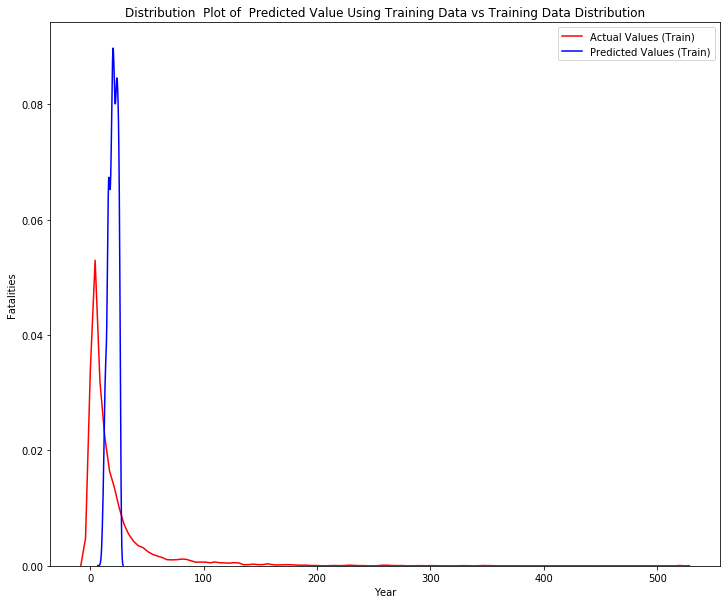

In [194]:
Title = 'Distribution  Plot of  Predicted Value Using Training Data vs Training Data Distribution'
DistributionPlot(y_train, yhat_train, "Actual Values (Train)", "Predicted Values (Train)", Title)

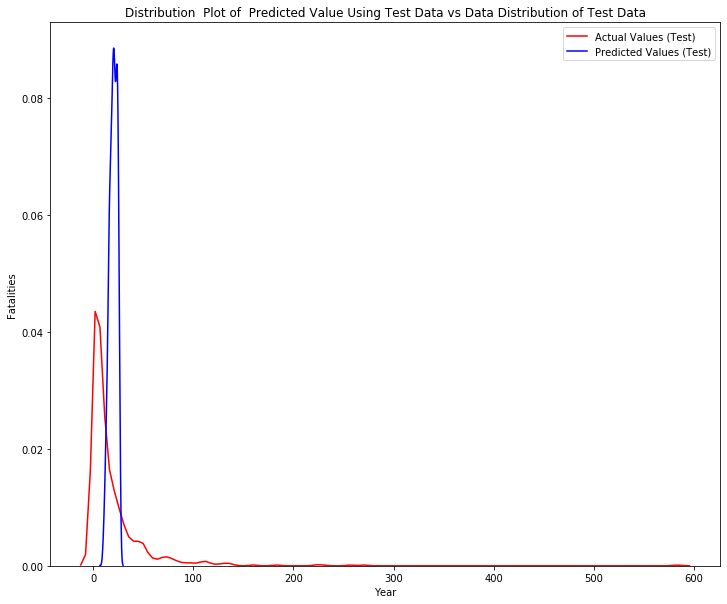

In [195]:
Title='Distribution  Plot of  Predicted Value Using Test Data vs Data Distribution of Test Data'
DistributionPlot(y_test,yhat_test,"Actual Values (Test)","Predicted Values (Test)",Title)

In [196]:
from sklearn.preprocessing import PolynomialFeatures
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.45, random_state=0)

In [197]:
pr = PolynomialFeatures(degree=5)
x_train_pr = pr.fit_transform(x_train[['Year']])
x_test_pr = pr.fit_transform(x_test[['Year']])
pr

PolynomialFeatures(degree=5, include_bias=True, interaction_only=False,
                   order='C')

In [198]:
poly = LinearRegression()
poly.fit(x_train_pr, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [199]:
yhat = poly.predict(x_test_pr)
yhat[0:5]

array([10.77371688,  0.98356653, 13.46359517,  5.65564203, 25.107326  ])

In [200]:
print("Predicted values:", yhat[0:4])
print("True values:", y_test[0:4].values)

Predicted values: [10.77371688  0.98356653 13.46359517  5.65564203]
True values: [2. 1. 9. 4.]


C:\Users\alekhya.mateti\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
C:\Users\alekhya.mateti\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


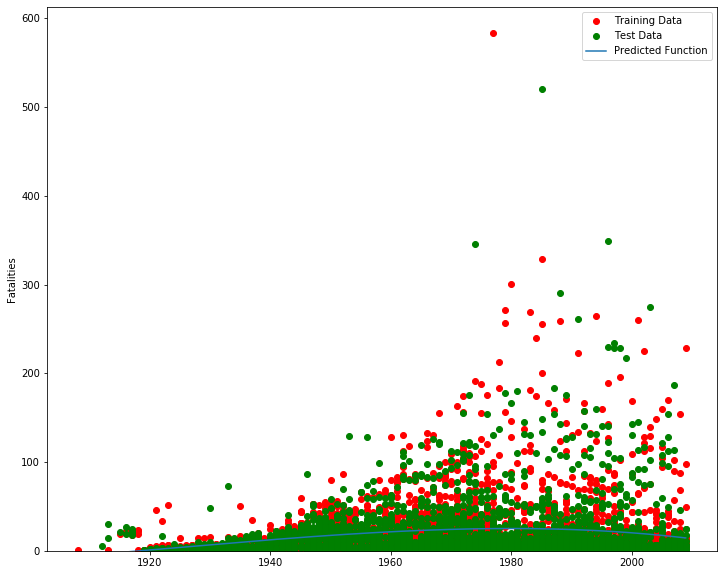

In [201]:
PollyPlot(x_train[['Year']], x_test[['Year']], y_train, y_test, poly,pr)

Text(0.5, 0, 'no. of fatalties')

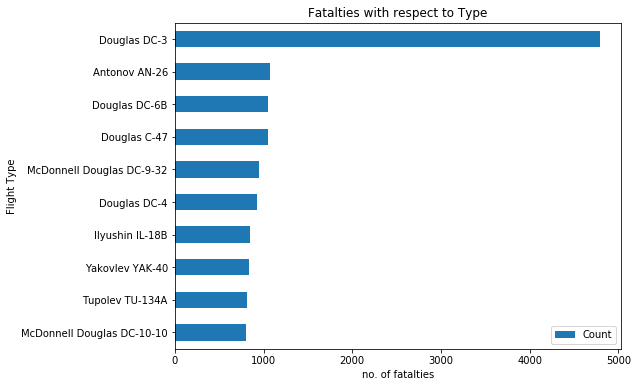

In [210]:
dataset.Type=dataset.Type.astype(str)
dataset['Type']=dataset['Type'].replace('nan','Un Identified')

Type_Dataset=dataset[['Fatalities','Type']].groupby('Type').sum()
Type_Dataset.rename(columns={"Fatalities":"Count"},inplace=True)
Type_Dataset["Type"]=Type_Dataset.index
#Route_Dataset.head()

Type_Dataset.sort_values(by = ['Count'],ascending=False,inplace=True)
Type_Dataset=Type_Dataset[0:10]
Type_Dataset.sort_values(by=['Count'],ascending=True,inplace=True)
# Type_Dataset 
Type_Dataset.plot(kind='barh',figsize=(8, 6))
plt.title("Fatalties with respect to Type")
plt.ylabel("Flight Type")
plt.xlabel("no. of fatalties")